## Stat 135 Lab Report 3

### Ishaan Srivastava

#### Introduction

In this lab we seek to understand the growth of female Dungeness crabs, commonly found along the Pacific coast of North America. We do so by recording the premolt and postmolt widths of the carapaces (shells) of 472 female Dungeness crabs. Molting is the process by which a crab grows, wherein it sheds its shell and grows a new skin which hardens to its new shell. We focus on understanding the relationship between the premolt shell size and the amount the shell grew by ie. the molt increment. For further background information about Dungeness crabs and the data, refer to Chapter 7 of "Stat Labs: Mathematical Statistics Through Applications" by Deborah Nolan and Terry Speed. As mentioned before, we have recorded the data for 472 Dungeness crabs, and we assume this sample is representative of the entire population of female Dungeness crabs. Note that all width measurements are in millimetres unless specified otherwise.

The first few rows of the table are provided below for reference.

In [121]:
crab_2.head(5)

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
3,126.2,143.3,17.1,NaN,0
4,126.7,139.3,12.6,NaN,0


#### Hypothesis Testing

We first conduct a test of the null hypothesis that the premolt and postmolt sizes are identical, with the alternative hypothesis that the postmold shell widths are larger on average ie. we have a one sided alternative. Since each row or observation corresponds to data about a single female Dungeness crab, we cannot treat the two samples as independent. Instead, we look at the paired differences, where each paired difference is the post molt width - pre molt width. Let us now define the following variables. $\bar{X}$ is the average premolt width, $\bar{Y}$ is the average postmolt width, $D_i$ is the paired difference in width for the $i$-th crab, and there are $n$ observations or crabs in total (recall that $n =$ 472). $\bar{D} = \bar{Y} - {X}, s_D^2 = \frac{1}{n-1} \Sigma_{i=1}^n (D_i - \bar{D})^2$. Under the null hypothesis, $\frac{\bar{D}}{s_D\cdot \sqrt{\frac{1}{n}}}$ follows the $t$ distribution with $n-1 =$ 471 degrees of freedom. Our observed test statistic is approximately 130.5659. We see that the 99.9th quantile for the $t_{471}$ distribution is 3.1076, so we reject the null hypothesis using a 0.001 p-value cutoff. Since the sample size is large, the central limit theorem should hold, but a histogram of the differences is plotted below all the same.

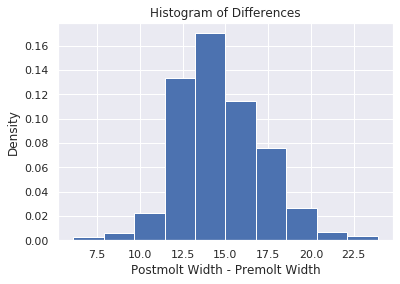

In [47]:
Image("Image 1.png")

We find that while the distribution is approximately normal, it is not perfectly symmetric. Thus while it should be appropriate to conduct the normal test, to verify our results we also conduct a nonparametric test; specifically, we perform a Wilcoxon signed rank test. Note that all the deviations are non negative, so the observed test statistic is simply $\Sigma_{i = 1}^n i = \Sigma_{i = 1}^{472} i =$ 111628. We observe that the p-value associated with this test statistic is 2.3530e-79, and thus we once again reject the null hypothesis with significance level 0.001. The benefit of the nonparametric approach is that we make no assumptions about the underlying distribution of the data, but at the same time the test we conduct is not as powerful for a given significance level. Regardless, we conclusively reject the null hypothesis in both tests. From a marine biology perspective, these findings line up with domain knowledge perfectly since the entire point of molting is for the crabs to grow, and as such we would expect that the post molt shell widths are larger. 

## Modelling

As mentioned earlier, we are interested in the relationship between the width increment and the premolt shell width. Since the increment is defined with respect to the premolt and postmolt width, it is the dependent variable while the premolt width is the independent variable. We begin by creating a scatterplot of our data, presented below.

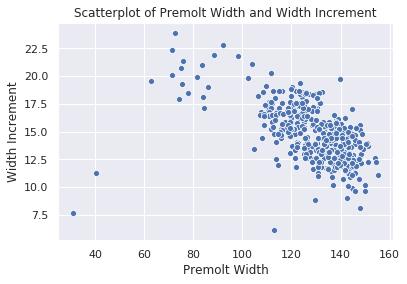

In [48]:
Image("Image 2.png")

Based on the scatterplot, we eliminate two possible models: constant relative growth and constant growth increment. If the former model were accurate, we would expect the data to approximately lie along a straight line that passes through the origin, while if the latter were accurate, we would expect the data to approximately lie along a horizontal line ie. along the line y = c for some constant c. The data clearly do not follow either of these trends so we reject both these models. Next, we consider constant growth increment for weight and an allometric relationship between carapace width and weight, which can be expressed by the equation $\text{log(molt     increment/premolt) = a + b * log(premolt)}$. Note that I flipped the sign of the second term compared to the equation provided in the lab specifications. We'll refer to this as model A instead of model 1 to avoid any confusion with the constant relative growth and constant growth increment models. Relevant plots for model A are provided below, including a scatterplot of the data with the regression line included in red, a scatterplot of the residuals, and a scatterplot of the residuals with the outliers excluded. A jusitification of why the third plot is included follows shortly.

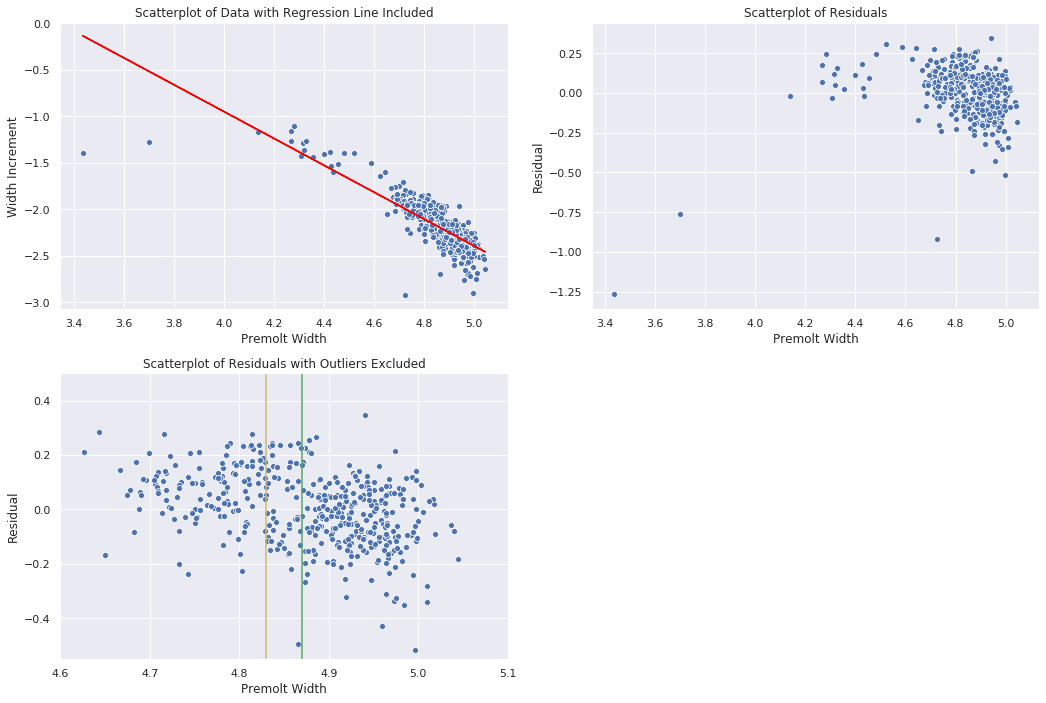

In [166]:
Image("Image 3.png")

Another possible model is linear extension of constant relative growth, represented by the equation $\text{molt increment = a + b * premolt}$, which we will call model B. As in the case of model A, relevant plots are provided below.

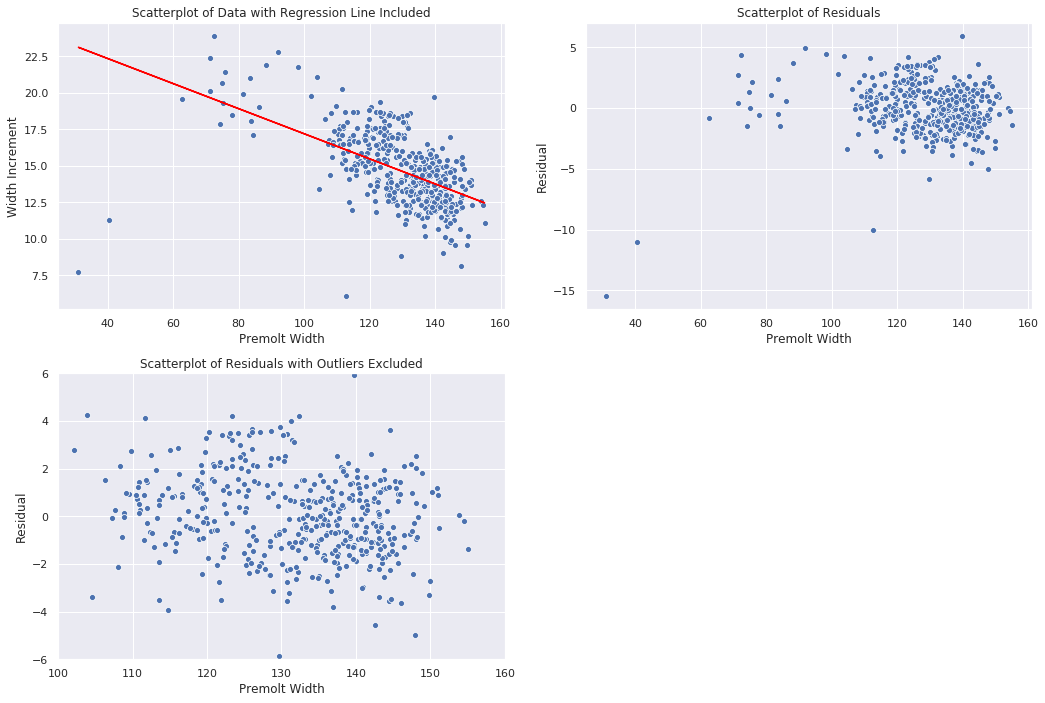

In [158]:
Image("Image 4.png")

The final model we consider (which we'll call model C) is a log-linear extension of constant relative growth denoted by the equation $\text{log(molt increment/premolt) = a + b * premolt}$. Once again, relevant plots are provided below.

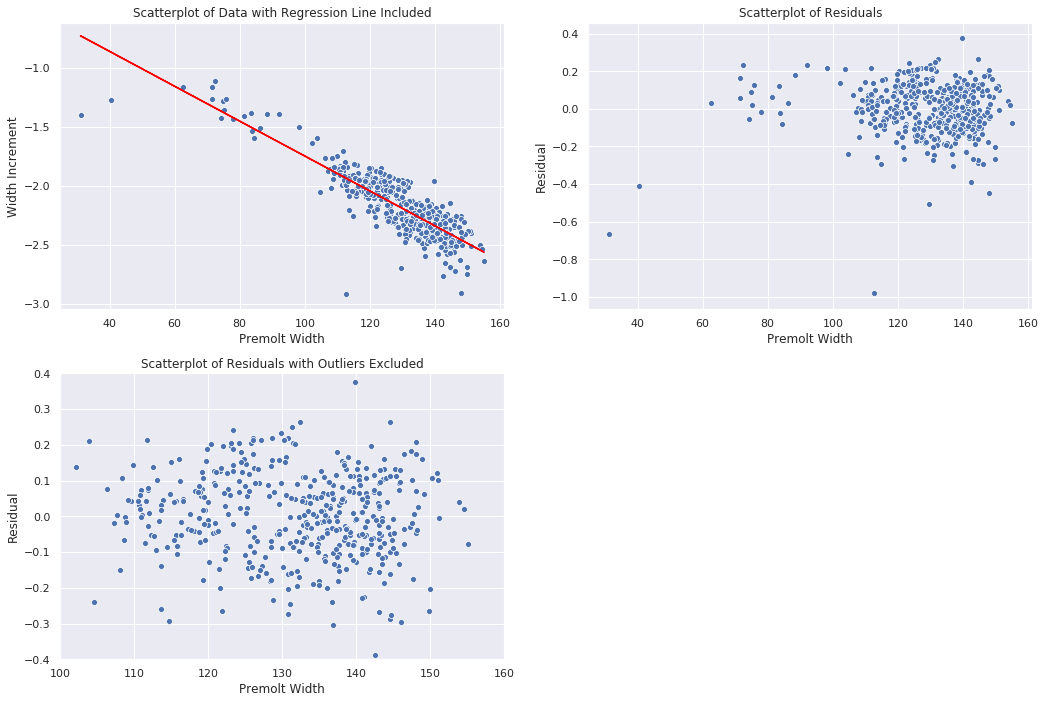

In [159]:
Image("Image 5.png")

When comparing the models, we have two quantitaive and one qualitative metric to consider, giving us 3 different ways to compare and evaluate our three models. The two quantitiave metrics are root mean squared error (RMSE) and the correlation coefficient r. Recall that an RMSE of 0 is ideal and low values are preferred, while r can range from -1 to 1, with values at/near either end of this range indicating a perfect/strong linear relationship and values at/around 0 indicating a weak/no linear relationship, respectively. The model parameters and two quatntiative metrics are summarised in the table provided below.

In [156]:
summary_df

,a (intercept),b (slope),r,RMSE
Model A,4.838729,-1.446401,-0.821416,0.153775
Model B,25.799274,-0.086005,-0.558134,2.026276
Model C,-0.270241,-0.014769,-0.868073,0.133851


The qualitative metric is based on examining the scatterplot of the residuals and checking it for linearity (centered around y = 0) and homoscedasticity (spread evenly). Since we'll check this visually instead of by performing calculations and analysing their results, this metric is deemed qualitative. We start by evaluating our models using this metric because if our assumptions regarding linearity and homoscedasticity do not hold then we reject the model outright. If we have multiple models remaining, we can move on to the quantiative metrics to further compare them.

We now begin actually evaluating our models. Note that for all 3 models, there are some outliers which reduce the linearity and homoscedasticity of the data and also interfere with the scale of the plot, making it harder to visually analyse the data. This is why a scatterplot of the residuals with outliers excluded is also provided, and these are the plots that are analysed in the discussion that follows.

The residuals in model A appear to be homoscedastic, however they do not appear to be linear since a majority of them for premolt width <= 4.83 (boundary marked with yellow line) are positive, while a majority for premolt width >= 4.87 (boundary marked with green line) are negative. In comparison, the residuals for model B and C are both linear and homoscedastic. As such, we reject model A, since the plot shows us that there is some trend in the residuals, meaning that there is some nonlinear relationship between our variables that a linear regression model does not suitably capture.

We now consider the r and RMSE values for models B and C. Model C has an r value of approximately -0.87 and an RMSE of 0.13, while model B has an r value of approximately -0.56 and an RMSE of 2.03. Since model C has a correlation whose absolute value is much closer to 1 and has an RMSE that's much lower relative to model B, we choose model C as our final linear model and conclude that the relationship between width increment and premolt width is a log-linear extension of constant relative growth. Recall that there were some outliers in our original residual scatterplot so we don't perfectly satisfy the assumptions of a linear model even in the case of model C, but since these points are few and our model has a high correlation and low RMSE, we conclude that it's a fairly accurate model that is consistent with the data. Note that from a biological perspective, this model is consistent with what we currently know about female Dungeness crab growth, so it's reassuring that we were able to arrive at the same answer through domain knowledge and statistical modelling and data analysis.

In [160]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Appendix

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from scipy.stats import t
from scipy.stats import norm
from IPython.display import Image
from scipy.stats import wilcoxon
sns.set()

In [153]:
summary_df = pd.DataFrame({"a (intercept)": [4.83872926, 25.79927406, -0.27024069], "b (slope)": [-1.44640089, -0.08600474, -0.01476893], "r":[-0.8214163168804705, -0.5581335126728038, -0.8680731722672342], "RMSE": [0.15377464638720914, 2.026275869027518, 0.13385134495023202]}, index = ["Model A", "Model B", "Model C"])
summary_df

,a (intercept),b (slope),r,RMSE
Model A,4.838729,-1.446401,-0.821416,0.153775
Model B,25.799274,-0.086005,-0.558134,2.026276
Model C,-0.270241,-0.014769,-0.868073,0.133851


In [51]:
crab_1 = pd.read_csv("crabpop.data", sep = "\s+")

In [52]:
crab_1.head(2)

,size,shell
0,116.8,1
1,117.1,1


In [92]:
crab_2 = pd.read_csv("crabs.data", sep = "\s+")
#crab_2 = crab_2[crab_2["lf"] == 1]
crab_2.head()

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
3,126.2,143.3,17.1,NaN,0
4,126.7,139.3,12.6,NaN,0


In [93]:
deviations = crab_2["postsz"] - crab_2["presz"]
dev_mean = np.mean(deviations)
length = len(deviations)
std_est = np.sqrt((1/(length-1))*np.sum((deviations - dev_mean)**2))
observed_stat = (np.mean(crab_2["postsz"]) -  np.mean(crab_2["presz"]))/(std_est*np.sqrt(1/length))
observed_stat

130.56558198217655

In [94]:
t.ppf(0.999, 471)

3.1076253050879297

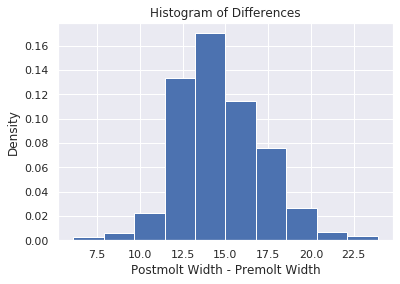

In [111]:
plt.figure(figsize=(6,4))
plt.hist(deviations, density = True);
plt.xlabel("Postmolt Width - Premolt Width")
plt.ylabel("Density")
plt.title("Histogram of Differences")
plt.savefig("Image 1.png", bbox_inches = "tight");

In [112]:
wilcoxon(deviations, alternative = "greater")

WilcoxonResult(statistic=111628.0, pvalue=2.3529491367448923e-79)

In [113]:
post = crab_2["postsz"]
pre = crab_2["presz"]
inc = crab_2["inc"]

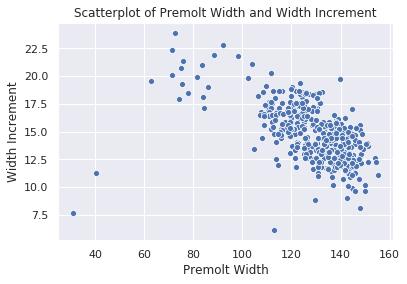

In [114]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = pre, y = inc);#, data = crab_2);
plt.xlabel("Premolt Width")
plt.ylabel("Width Increment")
plt.title("Scatterplot of Premolt Width and Width Increment");
plt.savefig("Image 2.png", bbox_inches = "tight")

In [126]:
model = lm.LinearRegression(fit_intercept = False)
df_model_1 = pd.DataFrame({"Log Pre": np.log(pre), "Bias": 1})
model.fit(df_model_1, np.log(inc/pre))
print(model.coef_)
print(-np.sqrt(model.score(df_model_1, np.log(inc/pre))))
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))
print(rmse(model.predict(df_model_1), np.log(inc/pre)))

[-1.44640089  4.83872926]
-0.8214163168804705
0.15377464638720914


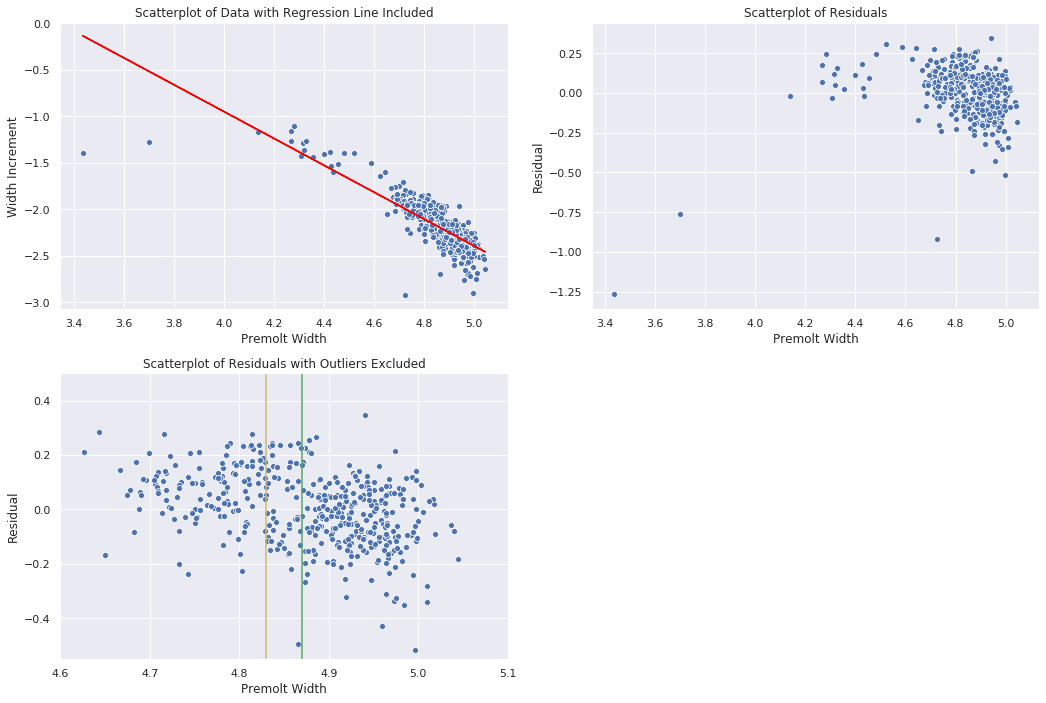

In [165]:
plt.figure(figsize=(15,10))
#plt.subplots_adjust(left  = 0.01, right = 0.99,bottom = 0.1,top = 0.9,wspace = 0.35,hspace = 0.35)
plt.subplot(2,2,1)
sns.scatterplot(x = np.log(pre), y = np.log(inc/pre))
plt.plot(np.log(pre), model.predict(df_model_1), "red");
plt.xlabel("Premolt Width")
plt.ylabel("Width Increment")
plt.title("Scatterplot of Data with Regression Line Included")
plt.subplot(2,2,2)
sns.scatterplot(np.log(pre), np.log(inc/pre) - model.predict(df_model_1))
plt.xlabel("Premolt Width")
plt.ylabel("Residual")
plt.title("Scatterplot of Residuals");
plt.subplot(2,2,3)
plt.tight_layout(2)
sns.scatterplot(np.log(pre), np.log(inc/pre) - model.predict(df_model_1))
plt.xlim(4.6,5.1)
plt.ylim(-0.55,0.5)
plt.axvline(x = 4.83, c = "y")
plt.axvline(x = 4.87, c = "g")
plt.xlabel("Premolt Width")
plt.ylabel("Residual")
plt.title("Scatterplot of Residuals with Outliers Excluded");
# #plt.suptitle("Plots for ")
#INSERT TITLES?
plt.savefig("Image 3.png", bbox_inches = "tight")


In [127]:
model_2 = lm.LinearRegression(fit_intercept = False)
df_model_2 = pd.DataFrame({"Pre": pre, "Bias": 1})
model_2.fit(df_model_2, inc)
print(model_2.coef_)
print(-np.sqrt(model_2.score(df_model_2, inc)))
print(rmse(model_2.predict(df_model_2), inc))

[-0.08600474 25.79927406]
-0.5581335126728038
2.026275869027518


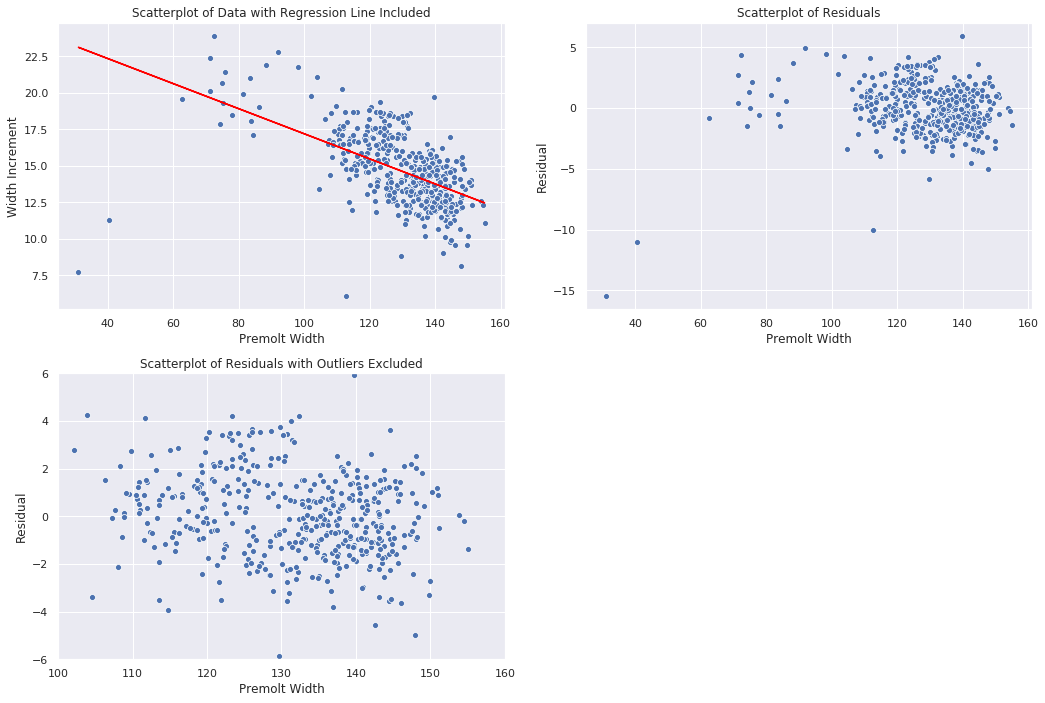

In [141]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = pre, y = inc)
plt.plot(pre, model_2.predict(df_model_2), "red");
plt.xlabel("Premolt Width")
plt.ylabel("Width Increment")
plt.title("Scatterplot of Data with Regression Line Included")
plt.subplot(2,2,2)
sns.scatterplot(pre, inc - model_2.predict(df_model_2))
plt.xlabel("Premolt Width")
plt.ylabel("Residual")
plt.title("Scatterplot of Residuals");
plt.subplot(2,2,3)
plt.tight_layout(2)
sns.scatterplot(pre, inc - model_2.predict(df_model_2))
plt.xlabel("Premolt Width")
plt.ylabel("Residual")
plt.title("Scatterplot of Residuals with Outliers Excluded");
plt.xlim(100,160)
plt.ylim(-6,6)
#plt.suptitle("Plots for ")
plt.savefig("Image 4.png", bbox_inches = "tight")

In [119]:
model_3 = lm.LinearRegression(fit_intercept = False)
df_model_3 = pd.DataFrame({"Pre": pre, "Bias": 1})
model_3.fit(df_model_3, np.log(inc/pre))
print(model_3.coef_)
print(-np.sqrt(model_3.score(df_model_3, np.log(inc/pre))))
print(rmse(model_3.predict(df_model_3), np.log(inc/pre)))
#sns.scatterplot(pre, np.log(inc/pre) - model_3.predict(df_model_3))
# plt.xlim(60,160)
# plt.ylim(-0.4, 0.4)

[-0.01476893 -0.27024069]
-0.8680731722672342
0.13385134495023202


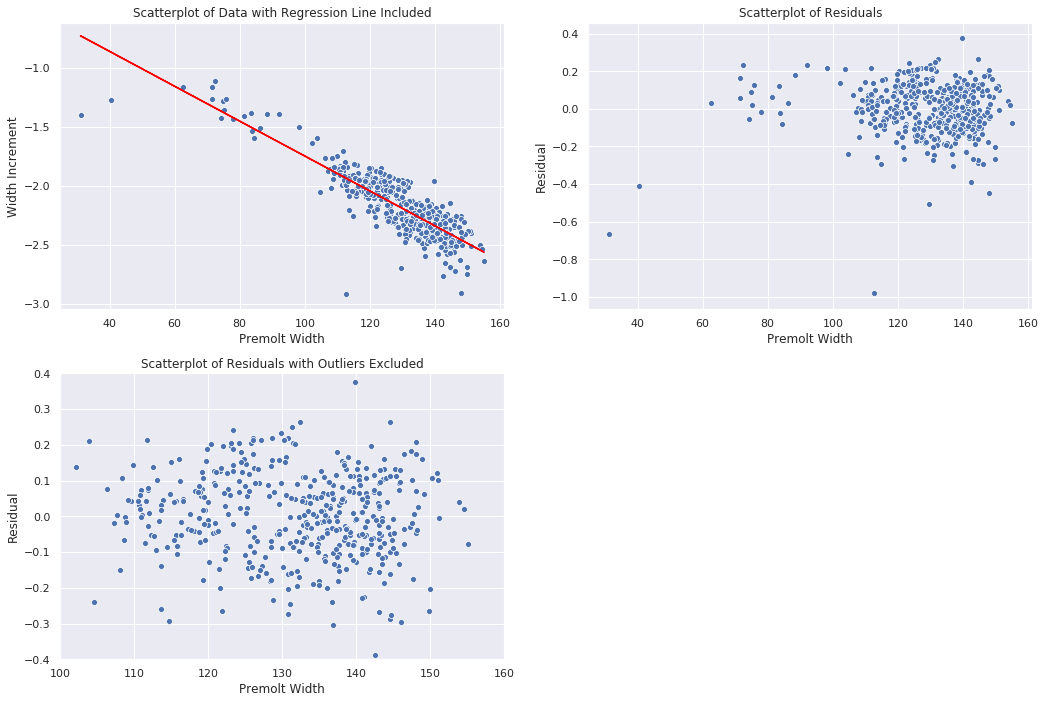

In [142]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = pre, y = np.log(inc/pre))
plt.plot(pre, model_3.predict(df_model_3), "red");
plt.xlabel("Premolt Width")
plt.ylabel("Width Increment")
plt.title("Scatterplot of Data with Regression Line Included")
plt.subplot(2,2,2)
sns.scatterplot(pre, np.log(inc/pre) - model_3.predict(df_model_3))
plt.xlabel("Premolt Width")
plt.ylabel("Residual")
plt.title("Scatterplot of Residuals");
plt.subplot(2,2,3)
plt.tight_layout(2)
sns.scatterplot(pre, np.log(inc/pre) - model_3.predict(df_model_3))
plt.xlabel("Premolt Width")
plt.ylabel("Residual")
plt.title("Scatterplot of Residuals with Outliers Excluded");
plt.xlim(100,160)
plt.ylim(-0.4,0.4)
#plt.suptitle("Plots for ")
plt.savefig("Image 5.png", bbox_inches = "tight")